In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def graficar_entrenamiento(filename):
    history = pickle.load( open( filename, "rb" ) )

    print(f"val_loss: {history['val_loss'][-1]}")
    print(f"loss: {history['loss'][-1]}")
    #print(history)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Unet network training 400-800-1000 hPa')
    plt.ylabel('mean absolute error')
    plt.xlabel('epoch')
    #plt.ylim(0,0.4)
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

## opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) - loss=mae
## Alturas: 400-800-1000 hPa (3-7-9)  /  channel_first

val_loss: 0.31826767325401306
loss: 0.3245305120944977


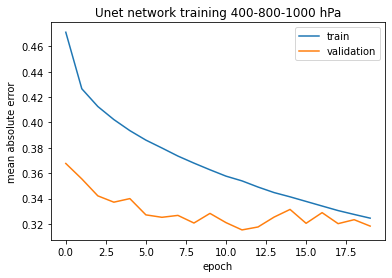

In [37]:
graficar_entrenamiento('/opt/datos/entrenamientos/gfs/01')

In [3]:
model = load_model('/opt/datos/entrenamientos/gfs/01.h5')
x_test = np.load("/opt/datos/dataset/gfs/X_test_3-7-9.npy")
y_test = np.load("/opt/datos/dataset/gfs/Y_test.npy")

x_test = x_test[:, :, 0:128, 0:144]
y_test = y_test[:, 0:128, 0:144]

print(x_test.shape)
print(y_test.shape)

(2893, 3, 137, 157)
(2893, 137, 157)


In [6]:
y_pred = model.predict(x_test)
print(y_pred.shape)

(2893, 1, 128, 144)


Text(0.5, 1.0, 'Prediccion')

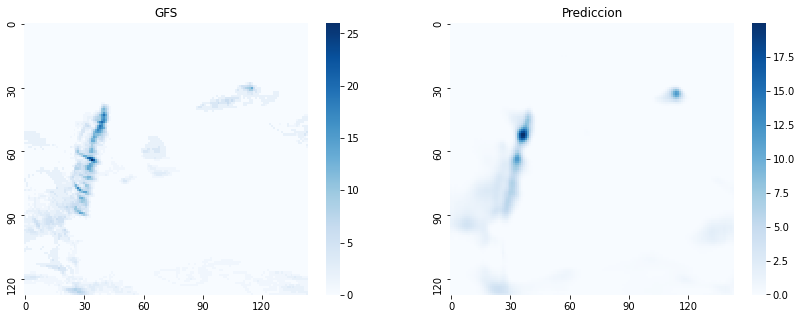

In [26]:
muestra = 2862
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

g1 = sns.heatmap(y_test[muestra, :, :],cmap="Blues",cbar=True, ax=ax1, xticklabels=30, yticklabels=30)
g1.set_title('GFS')
g2 = sns.heatmap(y_pred[muestra, 0, :, :],cmap="Blues",cbar=True, ax=ax2, xticklabels=30, yticklabels=30)
g2.set_title('Prediccion')

In [1]:
#-----------------------------------------------------------------------------------------------------------------

## opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) - loss=mae
## Alturas: 400-800-1000 hPa (3-7-9) / channel_last

val_loss: 0.3337084650993347
loss: 0.32094264030456543


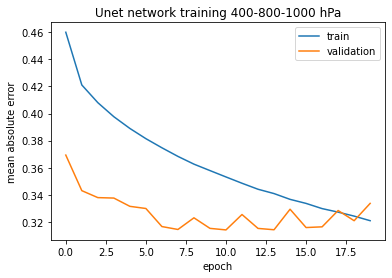

In [36]:
graficar_entrenamiento('/opt/datos/entrenamientos/gfs/02')

In [3]:
model = load_model('/opt/datos/entrenamientos/gfs/02.h5')
x_test = np.load("/opt/datos/dataset/gfs/X_test_3-7-9.npy")
y_test = np.load("/opt/datos/dataset/gfs/Y_test.npy")

x_test = x_test[:, :, 0:128, 0:144]
y_test = y_test[:, 0:128, 0:144]

# Muevo el eje RGB al ultimo
x_test = np.moveaxis(x_test, 1, 3)

print(x_test.shape)
print(y_test.shape)

(2893, 128, 144, 3)
(2893, 128, 144)


In [4]:
y_pred = model.predict(x_test)
print(y_pred.shape)

(2893, 128, 144, 1)


Text(0.5, 1.0, 'Prediccion')

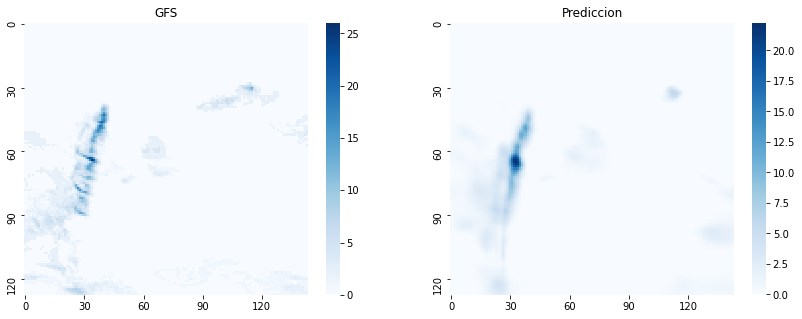

In [5]:
muestra = 2862
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

g1 = sns.heatmap(y_test[muestra, :, :],cmap="Blues",cbar=True, ax=ax1, xticklabels=30, yticklabels=30)
g1.set_title('GFS')
g2 = sns.heatmap(y_pred[muestra, :, :, 0],cmap="Blues",cbar=True, ax=ax2, xticklabels=30, yticklabels=30)
g2.set_title('Prediccion')

In [ ]:
#------------------------------------------------------------------------------------------------------------------

## opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) - loss=mae
## Alturas: 400-800-1000 hPa (3-7-9) / channel_first

val_loss: 0.32404306530952454
loss: 0.23154355585575104


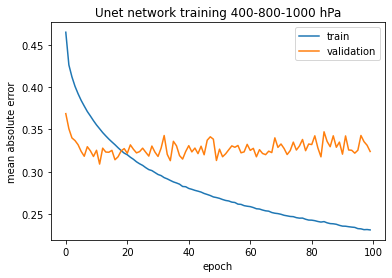

In [35]:
graficar_entrenamiento('/opt/datos/entrenamientos/gfs/03')

In [4]:
model = load_model('/opt/datos/entrenamientos/gfs/03.h5')
x_test = np.load("/opt/datos/dataset/gfs/X_test_3-7-9.npy")
y_test = np.load("/opt/datos/dataset/gfs/Y_test.npy")

x_test = x_test[:, :, 0:128, 0:144]
y_test = y_test[:, 0:128, 0:144]

print(x_test.shape)
print(y_test.shape)

(2893, 3, 128, 144)
(2893, 128, 144)


In [5]:
y_pred = model.predict(x_test)
print(y_pred.shape)

(2893, 1, 128, 144)


Text(0.5, 1.0, 'Prediccion')

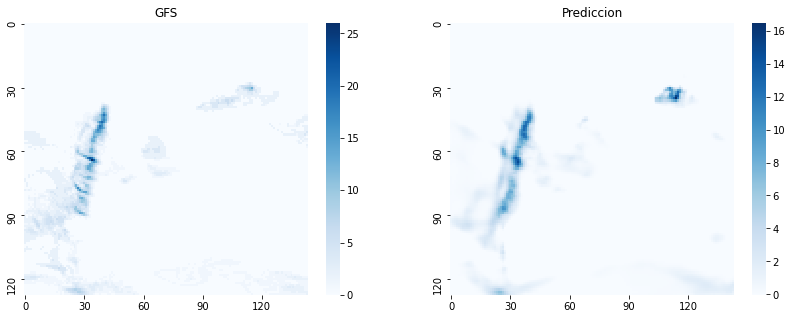

In [6]:
muestra = 2862
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

g1 = sns.heatmap(y_test[muestra, :, :],cmap="Blues",cbar=True, ax=ax1, xticklabels=30, yticklabels=30)
g1.set_title('GFS')
g2 = sns.heatmap(y_pred[muestra, 0, :, :],cmap="Blues",cbar=True, ax=ax2, xticklabels=30, yticklabels=30)
g2.set_title('Prediccion')

In [ ]:
#------------------------------------------------------------------------------------------------------------------

## opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) - loss=mae
## Alturas: 400-800-1000 hPa (3-7-9) / channel_ last

val_loss: 0.3307879865169525
loss: 0.23316173255443573


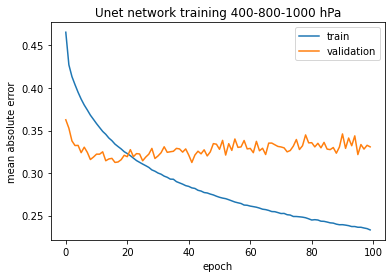

In [34]:
graficar_entrenamiento('/opt/datos/entrenamientos/gfs/04')

In [4]:
model = load_model('/opt/datos/entrenamientos/gfs/04.h5')
x_test = np.load("/opt/datos/dataset/gfs/X_test_3-7-9.npy")
y_test = np.load("/opt/datos/dataset/gfs/Y_test.npy")

x_test = x_test[:, :, 0:128, 0:144]
y_test = y_test[:, 0:128, 0:144]

# Muevo el eje RGB al ultimo
x_test = np.moveaxis(x_test, 1, 3)

print(x_test.shape)
print(y_test.shape)

(2893, 128, 144, 3)
(2893, 128, 144)


In [5]:
y_pred = model.predict(x_test)
print(y_pred.shape)

(2893, 128, 144, 1)


Text(0.5, 1.0, 'Prediccion')

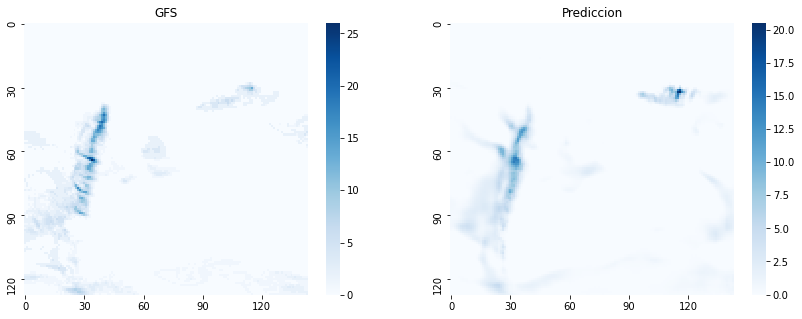

In [31]:
muestra = 2862
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

g1 = sns.heatmap(y_test[muestra, :, :],cmap="Blues",cbar=True, ax=ax1, xticklabels=30, yticklabels=30)
g1.set_title('GFS')
g2 = sns.heatmap(y_pred[muestra, :, :, 0],cmap="Blues",cbar=True, ax=ax2, xticklabels=30, yticklabels=30)
g2.set_title('Prediccion')

In [ ]:
#------------------------------------------------------------------------------------------------------------------

## opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) - loss=mae
## Alturas: 400-800-1000 hPa (3-7-9) / channel_ last
## SHUFFLE

val_loss: 0.3081340193748474
loss: 0.22565871477127075


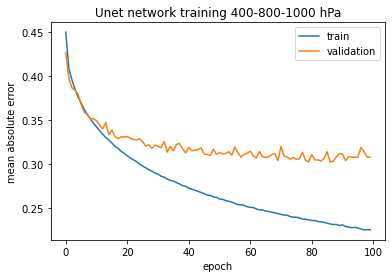

In [3]:
graficar_entrenamiento('/opt/datos/entrenamientos/gfs/05')

In [3]:
model = load_model('/opt/datos/entrenamientos/gfs/05.h5')
X = np.load("/opt/datos/dataset/gfs/X_shuffle_3-7-9.npy")
Y = np.load("/opt/datos/dataset/gfs/Y_shuffle.npy")

x_test = X[16395:19288, :, 0:128, 0:144]
X = None

y_test = Y[16395:19288, 0:128, 0:144]
Y = None

# Muevo el eje RGB al ultimo
x_test = np.moveaxis(x_test, 1, 3)

print(x_test.shape)
print(y_test.shape)

(2893, 128, 144, 3)
(2893, 128, 144)


In [4]:
y_pred = model.predict(x_test)
print(y_pred.shape)

(2893, 128, 144, 1)


Text(0.5, 1.0, 'Prediccion')

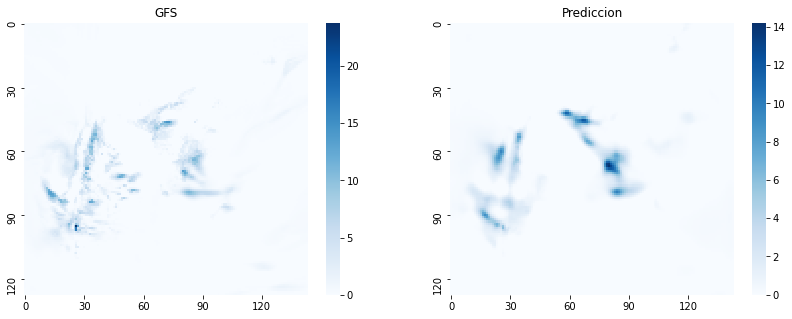

In [5]:
#1305
muestra = 2050
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

g1 = sns.heatmap(y_test[muestra, :, :],cmap="Blues",cbar=True, ax=ax1, xticklabels=30, yticklabels=30)
g1.set_title('GFS')
g2 = sns.heatmap(y_pred[muestra, :, :, 0],cmap="Blues",cbar=True, ax=ax2, xticklabels=30, yticklabels=30)
g2.set_title('Prediccion')

In [ ]:
#------------------------------------------------------------------------------------------------------------------

## opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) - loss=mae
## Alturas: 500-700-1000 hPa (4-6-9) / channel_ last
## SHUFFLE

val_loss: 0.304433137178421
loss: 0.22679895162582397


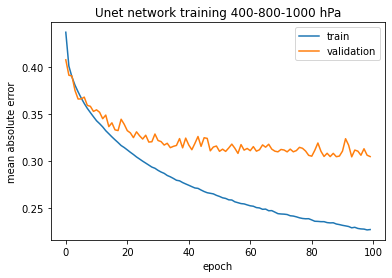

In [3]:
graficar_entrenamiento('/opt/datos/entrenamientos/gfs/06')

In [4]:
model = load_model('/opt/datos/entrenamientos/gfs/06.h5')
X = np.load("/opt/datos/dataset/gfs/X_shuffle_4-6-9.npy")
Y = np.load("/opt/datos/dataset/gfs/Y_shuffle.npy")

x_test = X[16395:19288, :, 0:128, 0:144]
X = None

y_test = Y[16395:19288, 0:128, 0:144]
Y = None

# Muevo el eje RGB al ultimo
x_test = np.moveaxis(x_test, 1, 3)

print(x_test.shape)
print(y_test.shape)

(2893, 128, 144, 3)
(2893, 128, 144)


In [5]:
y_pred = model.predict(x_test)
print(y_pred.shape)

(2893, 128, 144, 1)


Text(0.5, 1.0, 'Prediccion')

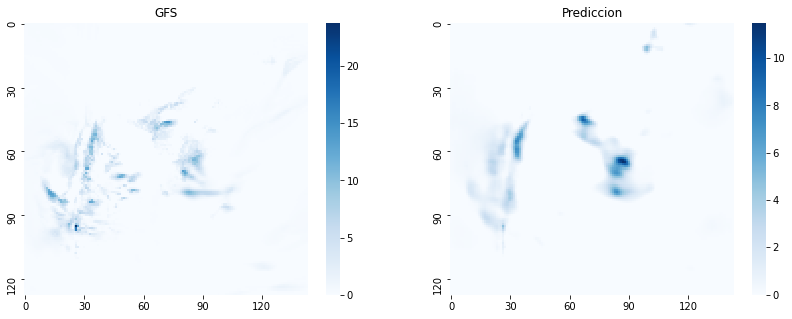

In [6]:
#1305
muestra = 2050
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

g1 = sns.heatmap(y_test[muestra, :, :],cmap="Blues",cbar=True, ax=ax1, xticklabels=30, yticklabels=30)
g1.set_title('GFS')
g2 = sns.heatmap(y_pred[muestra, :, :, 0],cmap="Blues",cbar=True, ax=ax2, xticklabels=30, yticklabels=30)
g2.set_title('Prediccion')

In [ ]:
#------------------------------------------------------------------------------------------------------------------

## opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) - loss=mae
## Alturas: 400-800-1000 hPa (3-7-9) / channel_ last
## SHUFFLE y REDONDEO

val_loss: 0.30471038818359375
loss: 0.22619542479515076


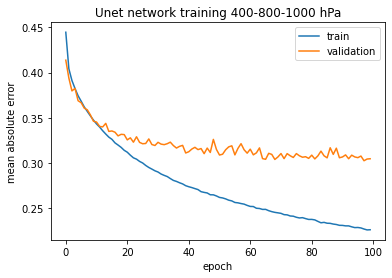

In [5]:
graficar_entrenamiento('/opt/datos/entrenamientos/gfs/07')

In [6]:
model = load_model('/opt/datos/entrenamientos/gfs/07.h5')
X = np.load("/opt/datos/dataset/gfs/X_shuffle_rounded.npy")
Y = np.load("/opt/datos/dataset/gfs/Y_shuffle.npy")

x_test = X[16395:19288, :, 0:128, 0:144]
X = None

y_test = Y[16395:19288, 0:128, 0:144]
Y = None

# Muevo el eje RGB al ultimo
x_test = np.moveaxis(x_test, 1, 3)

print(x_test.shape)
print(y_test.shape)

(2893, 128, 144, 3)
(2893, 128, 144)


In [7]:
y_pred = model.predict(x_test)
print(y_pred.shape)

(2893, 128, 144, 1)


Text(0.5, 1.0, 'Prediccion')

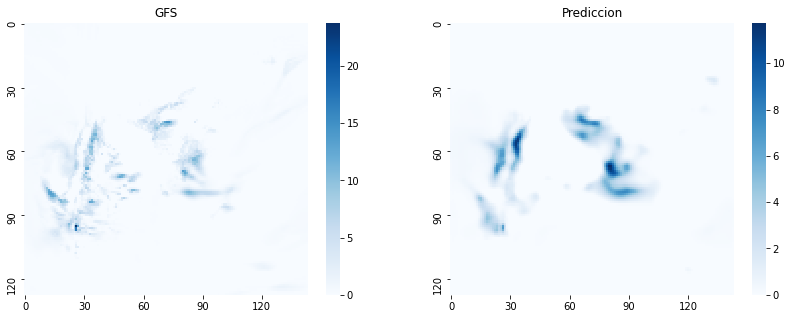

In [8]:
#1305
muestra = 2050
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

g1 = sns.heatmap(y_test[muestra, :, :],cmap="Blues",cbar=True, ax=ax1, xticklabels=30, yticklabels=30)
g1.set_title('GFS')
g2 = sns.heatmap(y_pred[muestra, :, :, 0],cmap="Blues",cbar=True, ax=ax2, xticklabels=30, yticklabels=30)
g2.set_title('Prediccion')

## opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) - loss=mae
## Alturas: 400-800-1000 hPa (3-7-9) / first_ last
## Modelo Encoder-Decoder capa final LSTM

val_loss: 0.35270440578460693
loss: 0.41196566820144653


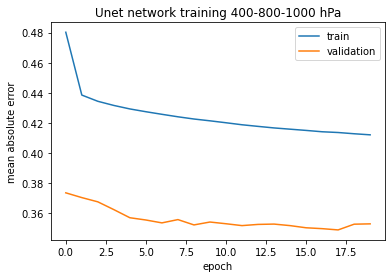

In [4]:
graficar_entrenamiento('/opt/datos/entrenamientos/gfs/08')

In [5]:
##Model:
model = load_model('/opt/datos/entrenamientos/gfs/08.h5')

## X:
X_test = np.load("/opt/datos/dataset/gfs/X_test_3-7-9.npy")
print(X_test.shape)

## Y:
Y_test= np.load("/opt/datos/dataset/gfs/Y_test.npy")
print(Y_test.shape)

(2893, 3, 137, 157)
(2893, 137, 157)


In [6]:
X_test_t = np.reshape(X_test[0:2892],(723,4,3,137,157))
X_test = None

Y_test_t = np.reshape(Y_test[0:2892],(723,4,137,157))
Y_test = None

In [7]:
# Recorte para obtener 128x144
X_test_t = X_test_t[:, :, :, 0:128, 0:144]
print(X_test_t.shape)

Y_test_t = Y_test_t[:, :, 0:128, 0:144]
print(Y_test_t.shape)

(723, 4, 3, 128, 144)
(723, 4, 128, 144)


In [9]:
Y_test_t = np.expand_dims(Y_test_t, axis=2)

print(Y_test_t.shape)

(723, 4, 1, 128, 144)


In [10]:
y_pred = model.predict(X_test_t)
print(y_pred.shape)

(723, 4, 1, 128, 144)


Text(0.5, 1.0, 'Prediccion')

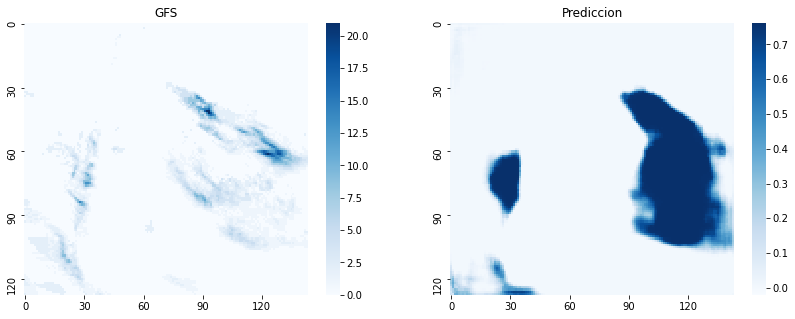

In [28]:
#1305
muestra = 3
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

g1 = sns.heatmap(Y_test_t[muestra, 0,0, :, :],cmap="Blues",cbar=True, ax=ax1, xticklabels=30, yticklabels=30)
g1.set_title('GFS')
g2 = sns.heatmap(y_pred[muestra, 0, 0,:, :],cmap="Blues",cbar=True, ax=ax2, xticklabels=30, yticklabels=30)
g2.set_title('Prediccion')

### Modelo con datos de GFS, Prediccion con datos viejos!

In [2]:
model = load_model('/opt/datos/entrenamientos/gfs/06.h5')
X = np.load("/opt/datos/dataset/sin_normalizar/X_test.npy")
Y = np.load("/opt/datos/dataset/milimetros/Y_test.npy")

x_test = X[:, :, 0:128, 0:144]
X = None

x_t = np.empty((1789, 3, 128, 144))

x_t[:,0,:,:] = x_test[:,2,:,:]
x_t[:,1,:,:] = x_test[:,1,:,:]
x_t[:,2,:,:] = x_test[:,0,:,:]

y_test = Y[:, 0:128, 0:144]
Y = None

# Muevo el eje RGB al ultimo
x_t = np.moveaxis(x_t, 1, 3)

print(x_t.shape)
print(y_test.shape)

(1789, 128, 144, 3)


NameError: name 'y_t' is not defined

In [3]:
y_pred_2 = model.predict(x_t)
print(y_pred_2.shape)

(1789, 128, 144, 1)


Text(0.5, 1.0, 'Prediccion')

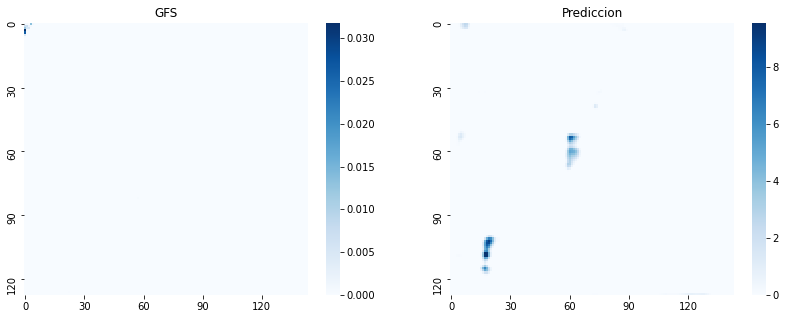

In [30]:
#1305
muestra = 110
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

g1 = sns.heatmap(y_test[muestra, :, :],cmap="Blues",cbar=True, ax=ax1, xticklabels=30, yticklabels=30)
g1.set_title('GFS')
g2 = sns.heatmap(y_pred_2[muestra, :, :, 0],cmap="Blues",cbar=True, ax=ax2, xticklabels=30, yticklabels=30)
g2.set_title('Prediccion')

In [11]:
x_t[:,:,:,2].max()

291.7607421875

### prediccion con grib viejo, antes de reproyeccion:

In [1]:
from osgeo import gdal

In [5]:
import rasterstats

In [12]:
model = load_model('/opt/datos/entrenamientos/gfs/06.h5')
grib = gdal.Open('/opt/wrfdatos/GFS025/2020_01/05_18/GFS_2020010518+009.grib2')

band500 = grib.GetRasterBand(99)
band700 = grib.GetRasterBand(119)
band1000 = grib.GetRasterBand(163)

data500 = band500.ReadAsArray()
data700 = band700.ReadAsArray()
data1000 = band1000.ReadAsArray()

data500 = data500[60:188, 60:204]
data700 = data700[60:188, 60:204]
data1000 = data1000[60:188, 60:204]

muestra = np.zeros((1, 128, 144, 3))
muestra[0,:,:,2] = data1000
muestra[0,:,:,1] = data700
muestra[0,:,:,0] = data500

In [13]:
y_pred = model.predict(muestra)
print(y_pred.shape)

(1, 128, 144, 1)


Text(0.5, 1.0, 'Prediccion')

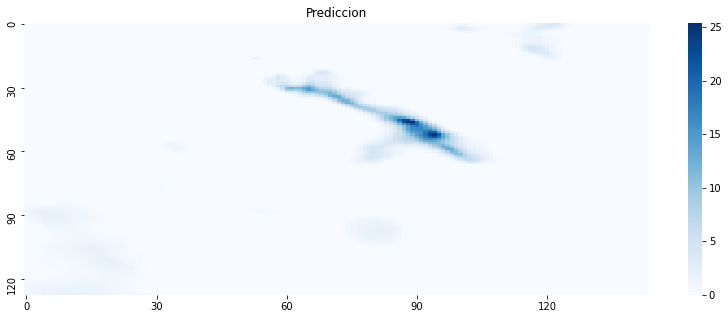

In [14]:
#1305
muestra = 0
fig,(ax2) = plt.subplots(1,1,figsize=(14,5))

g2 = sns.heatmap(y_pred[muestra, :, :, 0],cmap="Blues",cbar=True, ax=ax2, xticklabels=30, yticklabels=30)
g2.set_title('Prediccion')